# Logistic regression

## Step-1 Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### Step-1: Generate dummy dataset

In [2]:
n_features = 2
X, y = make_blobs(n_samples=2000, n_features=n_features, cluster_std=3, centers=2, random_state=42)
X.shape, y.shape

((2000, 2), (2000,))

### Step-2: Visualize clusters

In [3]:
def visualize(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

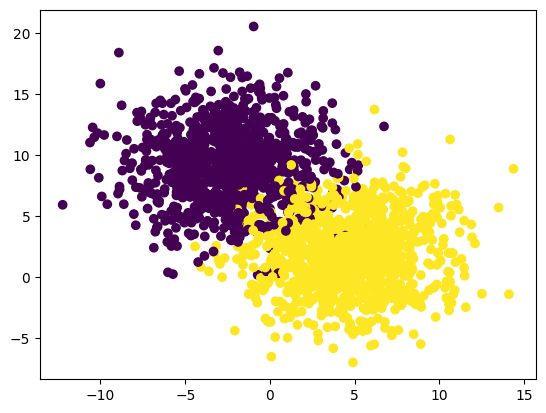

In [4]:
visualize(X,y)

### Step-3 normalize the dataset

In [5]:
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis = 0)

    return (X-u)/std

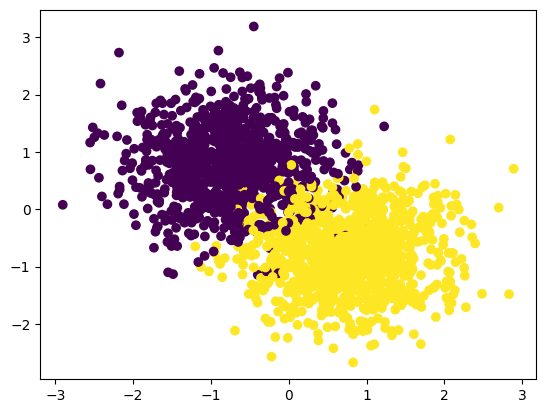

In [6]:
X = normalise(X)
visualize(X, y)

### Step-4 Train test split

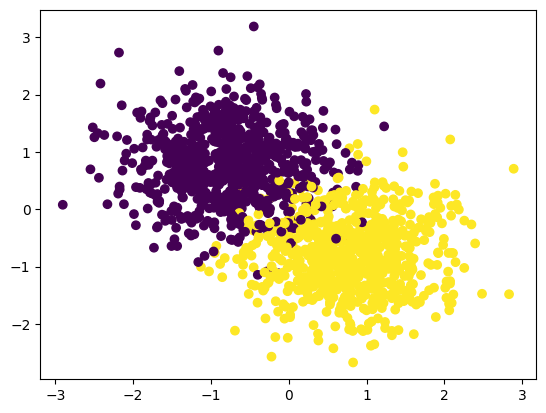

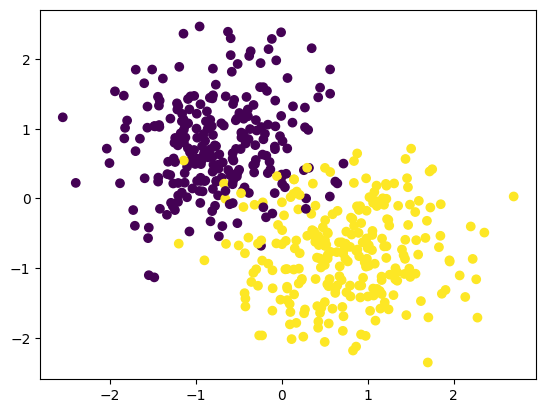

In [7]:
XT, Xt, yT, yt = train_test_split(X, y, test_size=0.25, random_state=0)
visualize(XT, yT)
visualize(Xt, yt)

### Step-2 hypothesis/logit model

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, theta):
    z = np.dot(X, theta)

    return sigmoid(z=z)

In [9]:
X.shape

(2000, 2)

### Step-3 Loss function

#### Binary cross entropy

In [10]:
def error(y, yp):

    return -np.mean(y * np.log(yp) + (1-y) * np.log(1 - yp))

### Step-4: radient computation

In [11]:
def gradient(X, y, yp):
    m = X.shape[0]
    return (-1/m)*np.dot(X.T, (y - yp))

### Step-5: Training

In [12]:
def training(X, y, max_iterations=300, learning_rate=0.1):
    
    theta = np.random.randn(n_features + 1, 1)
    errors_list = []
    for _ in range(max_iterations):
        yp = hypothesis(X=X,theta=theta)
        err = error(y, yp)
        errors_list.append(err)
        gradients = gradient(X, y, yp)
        theta = theta - learning_rate * gradients
    plt.plot(errors_list)
    plt.show()
    return theta

In [13]:
XT.shape, yT.shape

((1500, 2), (1500,))

In [14]:
yT = yT.reshape(-1,1)
yt= yt.reshape(-1,1)

In [15]:
def addExtraColumn(X):
    if n_features == X.shape[1]:
        first = np.ones((X.shape[0], 1))
        X = np.concatenate([first, X], axis=1)
    return X

In [16]:
# Add column full of ones for theta 0
XT = addExtraColumn(XT)

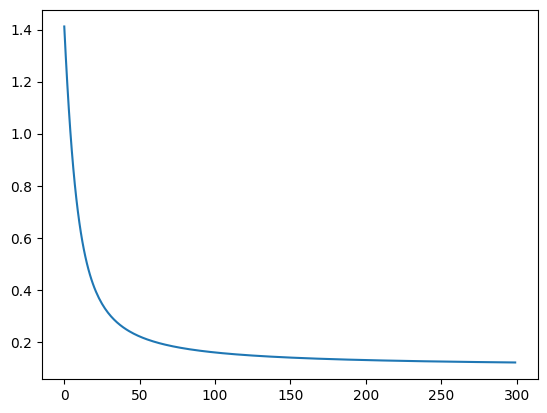

In [17]:
theta = training(XT, yT, max_iterations=300, learning_rate=0.2)

In [18]:
theta

array([[-0.02572628],
       [ 2.43255386],
       [-2.87574916]])

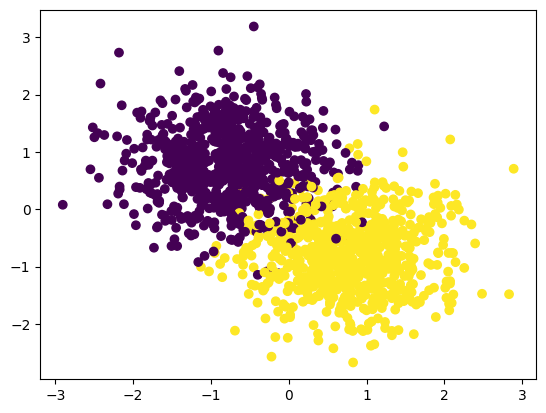

In [19]:
plt.scatter(XT[:, 1], XT[:, 2], c=yT)

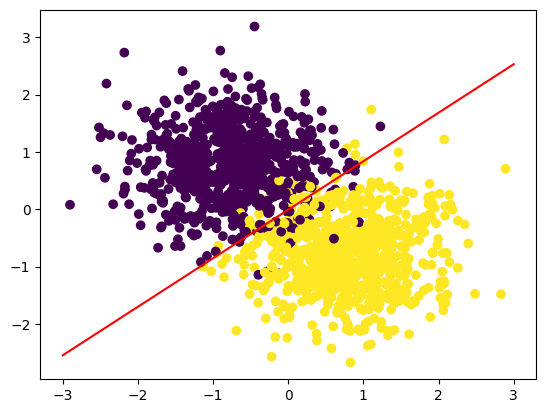

In [20]:
plt.scatter(XT[:, 1], XT[:, 2],c=yT)
x1 = np.linspace(-3, 3, 6)
x2 = -(theta[0]+ theta[1]*x1) / theta[2]
plt.plot(x1,x2, c='red')

### Step-6 Prediction on test and training data

In [21]:
def predict(X, theta):
    h =  hypothesis(X,theta)
    predictions = np.zeros((X.shape[0], 1), dtype=int)
    predictions[h >= 0.5] = 1
    return predictions

In [22]:
Xt = addExtraColumn(Xt)

In [23]:
y_predict = predict(XT, theta)

In [24]:
y_predict

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], shape=(1500, 1))

In [25]:
def accuracy(X, y, theta):
    preds = predict(X, theta)
    return ((y==preds).sum()) / y.shape[0]*100

In [26]:
accuracy(XT, yT, theta)

np.float64(95.73333333333333)

In [27]:
accuracy(Xt, yt, theta)

np.float64(95.6)